# Compare inference time of CapsNet vs ConvNet on MNIST

In [38]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

tf.__version__
%matplotlib inline

In [39]:
# Setting PATH to import utils functions from python file to notebook

import os
import sys
directory_path = os.path.abspath(os.path.join('../src'))
if directory_path not in sys.path:
    sys.path.append(directory_path)

from utils.load_data import load_mnist
from CapsNet import CapsNet

In [40]:
(X_train, y_train), (X_test , y_test) = load_mnist(size=(1024, 512))
X_train.shape, y_train.shape

(TensorShape([1024, 28, 28, 1]), (1024,))

## Baseline model

In [41]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_3"


_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 5408)              0         
                                                                 
 dense_10 (Dense)            (None, 100)               540900    
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.compile(tf.optimizers.legacy.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [43]:
tf_y_train = tf.keras.utils.to_categorical(y_train)
tf_y_test = tf.keras.utils.to_categorical(y_test)

history = model.fit(X_train, tf_y_train, epochs=10, batch_size=32, validation_data=(X_test, tf_y_test))

Epoch 1/10
32/32 [==============================] - 0s 9ms/step - loss: 1.2197 - accuracy: 0.6680 - val_loss: 0.6767 - val_accuracy: 0.7832
Epoch 2/10
32/32 [==============================] - 0s 7ms/step - loss: 0.4134 - accuracy: 0.8721 - val_loss: 0.4711 - val_accuracy: 0.8672
Epoch 3/10
32/32 [==============================] - 0s 7ms/step - loss: 0.2861 - accuracy: 0.9092 - val_loss: 0.3939 - val_accuracy: 0.8750
Epoch 4/10
32/32 [==============================] - 0s 7ms/step - loss: 0.2042 - accuracy: 0.9443 - val_loss: 0.3619 - val_accuracy: 0.8809
Epoch 5/10
32/32 [==============================] - 0s 7ms/step - loss: 0.1450 - accuracy: 0.9629 - val_loss: 0.3707 - val_accuracy: 0.8809
Epoch 6/10
32/32 [==============================] - 0s 7ms/step - loss: 0.1145 - accuracy: 0.9707 - val_loss: 0.3333 - val_accuracy: 0.8750
Epoch 7/10
32/32 [==============================] - 0s 7ms/step - loss: 0.0797 - accuracy: 0.9844 - val_loss: 0.3146 - val_accuracy: 0.9023
Epoch 8/10
32/32 [==

## CapsNet model

In [44]:
params = {
    "epochs": 10,
    "epsilon": 1e-7,
    "m_minus": 0.1,
    "m_plus": 0.9,
    "lambda_": 0.5,
    "alpha": 0.0005,
    "no_of_conv_kernels": 128,
    "no_of_primary_capsules": 32,
    "no_of_secondary_capsules": 10,
    "primary_capsule_vector": 8,
    "secondary_capsule_vector": 16,
    "r":3,
}

caps_model = CapsNet(**params)
caps_model._name = 'CapsNet-MNIST'
caps_model.compile()
caps_model.summary()

Model: "CapsNet-MNIST"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 ConvolutionLayer (Conv2D)   multiple                  0 (unused)
                                                                 
 PrimaryCapsule (Conv2D)     multiple                  0 (unused)
                                                                 
 dense_12 (Dense)            multiple                  0 (unused)
                                                                 
 dense_13 (Dense)            multiple                  0 (unused)
                                                                 
Total params: 1,474,560
Trainable params: 1,474,560
Non-trainable params: 0
_________________________________________________________________


In [45]:
params = {"epochs": 5, 
 "r": 3, 
 "no_of_conv_kernels": 64, 
 "no_of_primary_capsules": 32,
 "no_of_secondary_capsules": 10,
 "primary_capsule_vector": 8,
 "secondary_capsule_vector": 4, 
 "epsilon": 0.03278479385051277, 
 "m_plus": 0.9859306060226133, 
 "m_minus": 0.09362553278234906, 
 "lambda_": 0.30217532791110535, 
 "alpha": 0.0021431748570353852}


caps_model_nas = CapsNet(**params)
caps_model_nas._name = 'CapsNet-MNIST_NAS'
caps_model_nas.compile()
caps_model_nas.summary()
caps_model_nas.fit(X_train, y_train, tf.keras.optimizers.legacy.Adam(), train_metrics=['accuracy'], validation=(X_test, y_test))

Model: "CapsNet-MNIST_NAS"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 ConvolutionLayer (Conv2D)   multiple                  0 (unused)
                                                                 
 PrimaryCapsule (Conv2D)     multiple                  0 (unused)
                                                                 
 dense_14 (Dense)            multiple                  0 (unused)
                                                                 
 dense_15 (Dense)            multiple                  0 (unused)
                                                                 
Total params: 368,640
Trainable params: 368,640
Non-trainable params: 0
_________________________________________________________________


Epoch 5/5: 100%|██████████| 16/16 [00:03<00:00,  4.30it/s, Training loss : 0.0014, Validation loss : 0.0019]


{'accuracy': ListWrapper([0.8525390625, 0.908203125, 0.939453125, 0.96484375, 0.974609375]),
 'loss': ListWrapper([0.006940120831131935, 0.0031188924331218004, 0.0022656063083559275, 0.0017215852858498693, 0.0013638667296618223]),
 'val_accuracy': ListWrapper([0.7421875, 0.84375, 0.884765625, 0.919921875, 0.9296875]),
 'val_loss': ListWrapper([0.004171065986156464, 0.0031010156963020563, 0.0024649035185575485, 0.0021279696375131607, 0.0018952639074996114])}

In [46]:
caps_model.fit(X_train, y_train, tf.keras.optimizers.legacy.Adam(), train_metrics=['accuracy'], validation=(X_test, y_test))

Epoch 10/10: 100%|██████████| 16/16 [00:06<00:00,  2.31it/s, Training loss : 0.0002, Validation loss : 0.0009]


{'accuracy': ListWrapper([0.8203125, 0.912109375, 0.9443359375, 0.9697265625, 0.9833984375, 0.9912109375, 0.9951171875, 0.99609375, 0.9970703125, 0.998046875]),
 'loss': ListWrapper([0.007385117933154106, 0.0028392199892550707, 0.0017372871516272426, 0.0011296499287709594, 0.0007949600694701076, 0.0005706305964849889, 0.0004291633958928287, 0.0003295440401416272, 0.0002577349077910185, 0.00020554292132146657]),
 'val_accuracy': ListWrapper([0.708984375, 0.833984375, 0.90625, 0.931640625, 0.947265625, 0.95703125, 0.95703125, 0.95703125, 0.95703125, 0.9609375]),
 'val_loss': ListWrapper([0.0043736668303608894, 0.0026848134584724903, 0.0019158178474754095, 0.0015124105848371983, 0.001261222641915083, 0.0011525214649736881, 0.001051159924827516, 0.0009926700731739402, 0.0009769153548404574, 0.0009302982361987233])}

In [47]:
caps_model.training_metrics['loss'] = [loss * 100 for loss in caps_model.training_metrics['loss']]
caps_model.training_metrics['val_loss'] = [val_loss * 100 for val_loss in caps_model.training_metrics['val_loss']]

caps_model.training_metrics = {
    'loss': caps_model.training_metrics['loss'],
    'accuracy': caps_model.training_metrics['accuracy'],
    'val_loss': caps_model.training_metrics['val_loss'],
    'val_accuracy': caps_model.training_metrics['val_accuracy'],
}

In [48]:
caps_model_nas.training_metrics['loss'] = [loss * 100 for loss in caps_model_nas.training_metrics['loss']]
caps_model_nas.training_metrics['val_loss'] = [val_loss * 100 for val_loss in caps_model_nas.training_metrics['val_loss']]

caps_model_nas.training_metrics = {
    'loss': caps_model_nas.training_metrics['loss'],
    'accuracy': caps_model_nas.training_metrics['accuracy'],
    'val_loss': caps_model_nas.training_metrics['val_loss'],
    'val_accuracy': caps_model_nas.training_metrics['val_accuracy'],
}

## Evaluation

In [49]:
import time

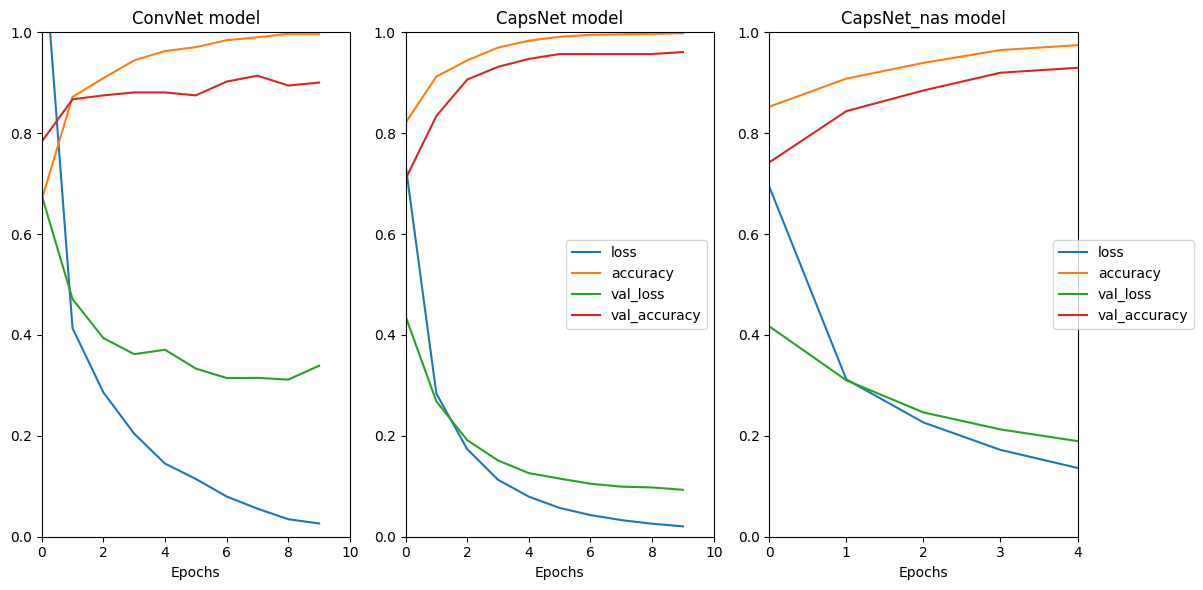

In [66]:
fig, axes = plt.subplots(1, 3, figsize=(12, 6))

df_baseline = pd.DataFrame(history.history)
plot_baseline = df_baseline.plot(ax=axes[0], title="ConvNet model", legend=False)
axes[0].set_ylim(0, 1)
axes[0].set_xlim(0, 10)

df_capsnet = pd.DataFrame(caps_model.training_metrics)
plot_capsnet = df_capsnet.plot(ax=axes[1], title="CapsNet model")  # Set legend=False here
axes[1].set_ylim(0, 1)
axes[1].set_xlim(0, 10)

df_capsnet_nas = pd.DataFrame(caps_model_nas.training_metrics)
plot_capsnet_nas = df_capsnet_nas.plot(ax=axes[2], title="CapsNet_nas model")  # Set legend=False here
axes[2].set_ylim(0, 1)
axes[2].set_xlim(0, 4)

axes[0].set_xlabel("Epochs")
axes[1].set_xlabel("Epochs")
axes[2].set_xlabel("Epochs")


# Show only one legend for both plots
handles, labels = axes[2].get_legend_handles_labels()
axes[2].legend(handles, labels, loc='center right', bbox_to_anchor=(1.4, 0.5), fancybox=True, ncol=1)

plt.tight_layout()
plt.show()

In [55]:
n_rounds = 100

In [56]:
conv_inv_time = []
for i in range(n_rounds):
    start = time.time()
    model.predict(X_test, verbose=False)
    end = time.time()
    conv_inv_time.append((end - start) / len(X_test) * 1000)

In [57]:
caps_inv_time = []
for i in range(n_rounds):
    start = time.time()
    caps_model.predict(X_test)
    end = time.time()
    caps_inv_time.append((end - start) / len(X_test) * 1000)

In [58]:
caps_nas_inv_time = []
for i in range(n_rounds):
    start = time.time()
    caps_model_nas.predict(X_test)
    end = time.time()
    caps_nas_inv_time.append((end - start) / len(X_test) * 1000)

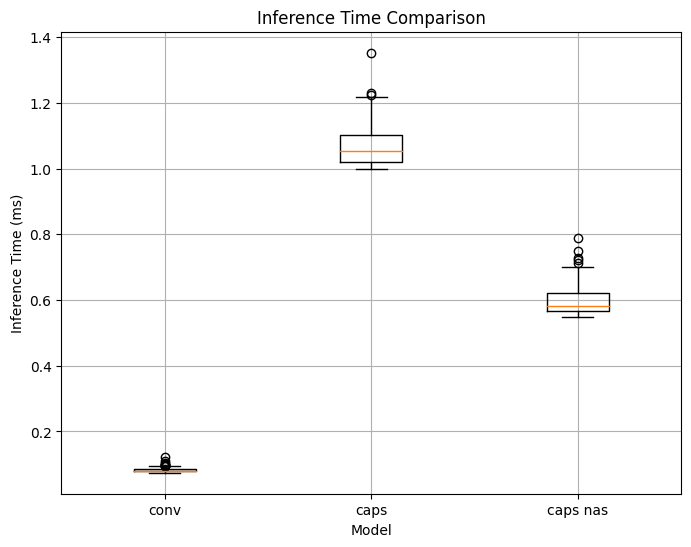

In [59]:
df = pd.DataFrame({
    "conv": conv_inv_time,
    "caps": caps_inv_time,
    "caps nas": caps_nas_inv_time
})
plt.figure(figsize=(8, 6))
plt.boxplot(df.values, labels=df.columns)
plt.title('Inference Time Comparison')
plt.xlabel('Model')
plt.ylabel('Inference Time (ms)')
plt.grid(True)
plt.show()

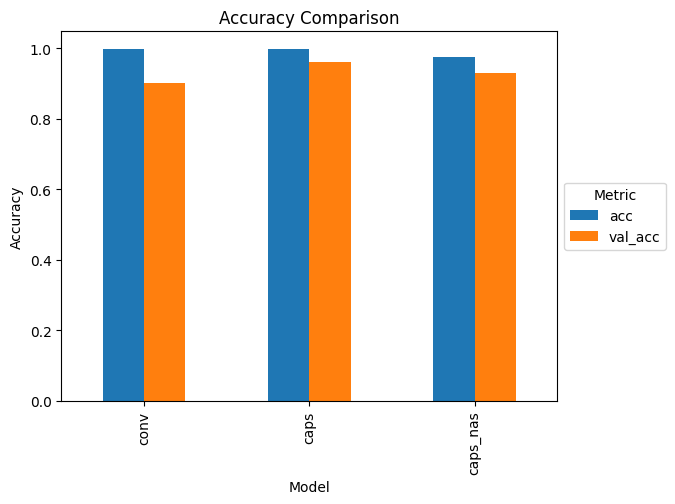

In [65]:
df = pd.DataFrame({
    'conv': {'acc': history.history['accuracy'][-1], 'val_acc': history.history['val_accuracy'][-1]},
    'caps': {'acc': caps_model.training_metrics['accuracy'][-1], 'val_acc': caps_model.training_metrics['val_accuracy'][-1]},
    'caps_nas': {'acc': caps_model_nas.training_metrics['accuracy'][-1], 'val_acc': caps_model_nas.training_metrics['val_accuracy'][-1]},
})

df = df.T
df.plot(kind='bar')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.legend(title='Metric', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
